In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [162]:
df = pd.read_csv("candy-data.csv")
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [163]:
df = df.drop("competitorname", axis= 1)

In [164]:
df.isnull().sum()

chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

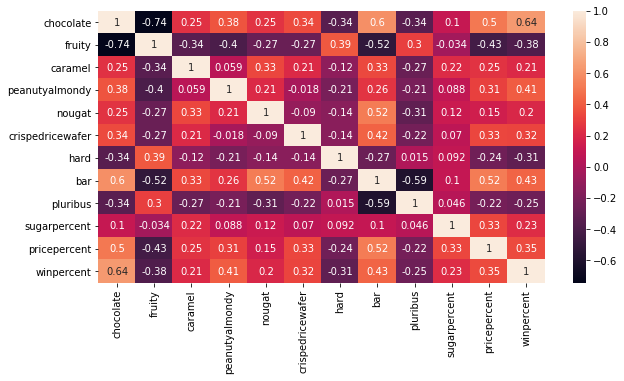

In [165]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.heatmap(data = df.corr(), ax = ax, annot = True)

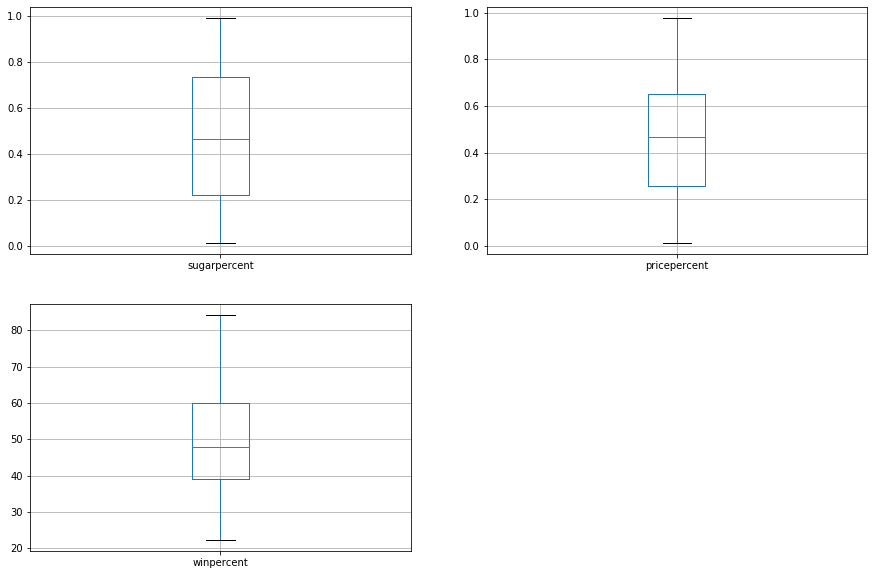

In [166]:
plt.figure(figsize = (15, 10))

plt.subplot(2,2,1)
fig = df.boxplot(column = ['sugarpercent'])
# fig.set_title("sugarpercent")

plt.subplot(2,2,2)
fig = df.boxplot(['pricepercent'])
# fig.set_title("pricepercent")


plt.subplot(2,2,3)
fig = df.boxplot(['winpercent'])
# fig.set_title("BloodPressure")

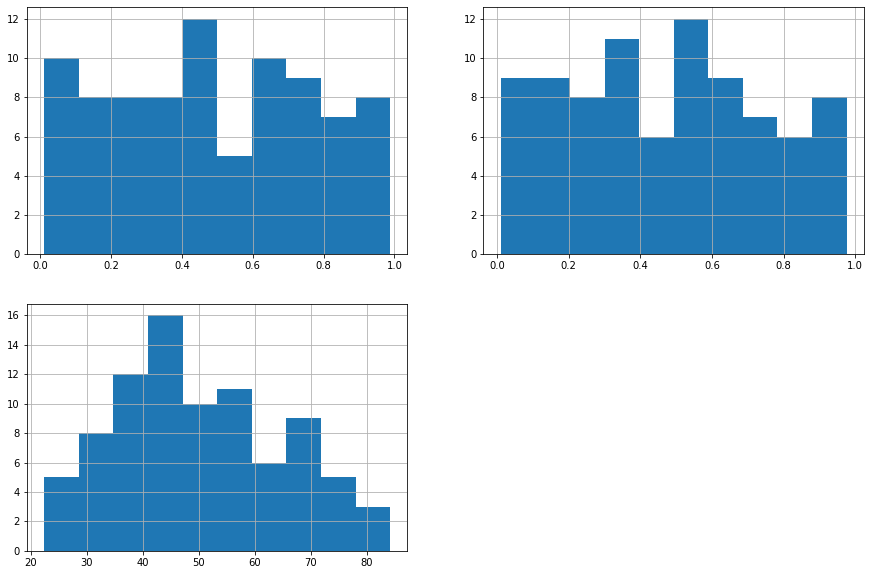

In [167]:
plt.figure(figsize = (15, 10))

plt.subplot(2,2,1)
fig = df['sugarpercent'].hist(bins=10)
# fig.set_title("Pregnancies")

plt.subplot(2,2,2)
fig = df['pricepercent'].hist(bins=10)
# fig.set_title("Glucose")

plt.subplot(2,2,3)
fig = df['winpercent'].hist(bins=10)
# plt.xlim([0, 30])
# fig.set_title("BloodPressure")

In [168]:
df.head()
df["winpercent"].min()

22.445341

In [169]:
def probability(percent):
    
    if percent > 20 and percent <= 55:
        return 0
    elif percent > 55 and percent <= 90:
        return 1

In [170]:
df['winpercent'] = df['winpercent'].apply(lambda x: probability(x)) 

In [171]:
x = df.drop("winpercent", axis = 1)
y = df["winpercent"]
# df["winpercent"].max()

In [172]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [173]:
df.isnull().sum()

chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [174]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

xtrain = scaler.fit_transform(xtrain)

xtest = scaler.transform(xtest)

In [175]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(multi_class='ovr', solver='liblinear', penalty= 'l1')
logreg.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [176]:
y_pred = logreg.predict(xtest)

In [177]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_pred)

0.8235294117647058

In [178]:
train = logreg.score(xtrain, ytrain)
test = logreg.score(xtest, ytest)

In [179]:
train, test

(0.8088235294117647, 0.8235294117647058)